# Linear Regression Assignment
- To build a multiple linear regression model for the prediction of car prices based on features of a car.

Let's start by importing some libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')

Let's carry out some general inspection of the data as follows

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


The data is a blend of both numerical as well as categorical variables.

In [4]:
np.unique(data['car_ID'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

The variable `car_ID` is just a series of numbers starting from 1 to 205. Therefore, this column is redundant and hence can be dropped.

In [5]:
data.drop('car_ID', axis=1, inplace=True)

In [6]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No missing values in the data.

In [7]:
data.shape

(205, 25)

In [8]:
data.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Now, for the column `CarName`, let's extract the name of the company and dropping the rest.

In [9]:
def company(x):
    x = x.split(' ')
    return x[0]

In [10]:
data['CompanyName'] = data['CarName'].apply(company)

In [11]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


The name of the companies have been obtained in the column `CompanyName`. Let's now drop the column `CarName`.

In [12]:
data.drop('CarName', axis=1, inplace=True)

In [13]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [14]:
np.unique(data['CompanyName'])

array(['Nissan', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porcshce',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'volvo', 'vw'], dtype=object)

**Some Observations**
- `Nissan` is also mentioned as `nissan`. The differences between the cases has made separate categories while in fact they are    one category.
- `mazda` is mispelled as `maxda`.
- `porsche` is mispelled as `porcshce`.
- `toyota` is mispelled as `toyouta`.
- `volkswagen` is also mentioned as `vokswagen` and `vw`.

These issues need to be addressed before modelling. For the sake of simplicity, let's turn all the categories into lower case.

In [15]:
data['CompanyName'] = data['CompanyName'].str.lower()

Let's define a function to adress the issue of spelling mistakes.

In [16]:
def correction(x):
    if x == 'maxda' or x == 'mazda':
        return 'mazda'
    elif x == 'porcshce' or x == 'porsche':
        return 'porsche'
    elif x == 'toyouta' or x == 'toyota':
        return 'toyota'
    elif x == 'vokswagen' or x == 'vw' or x == 'volkswagen':
        return 'volkswagen'
    else:
        return x

In [17]:
data['CompanyName'] = data['CompanyName'].apply(correction)

In [18]:
np.unique(data['CompanyName'])

array(['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [19]:
len(np.unique(data['CompanyName']))

22

It can be observed that there are 22 distinct car companies.

In [20]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Let's carry out some visualization of the data to gain some insights about the data.

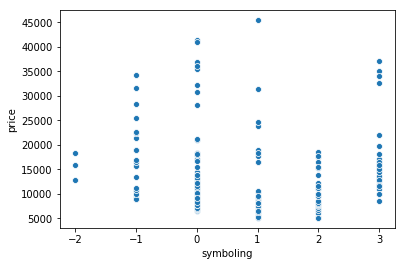

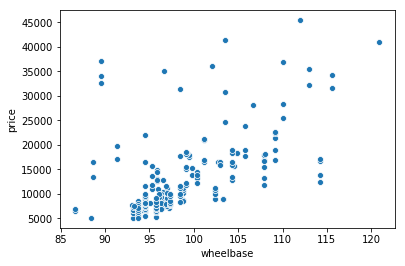

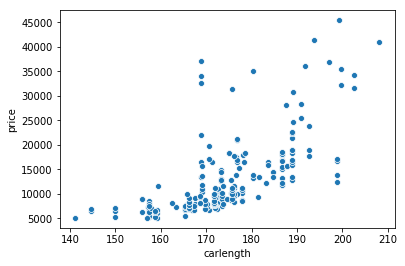

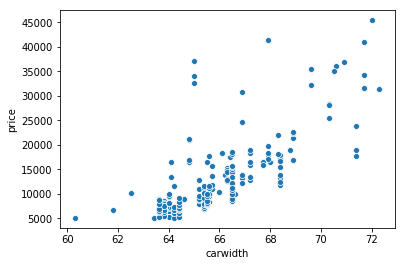

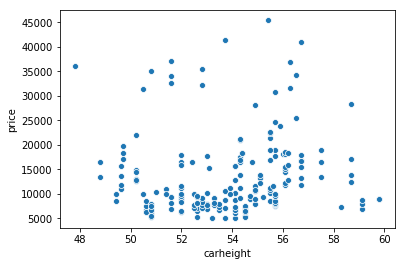

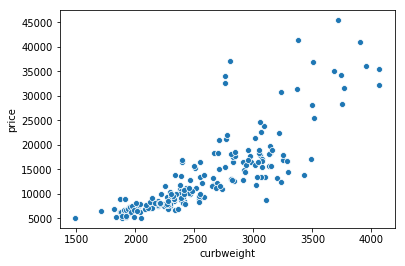

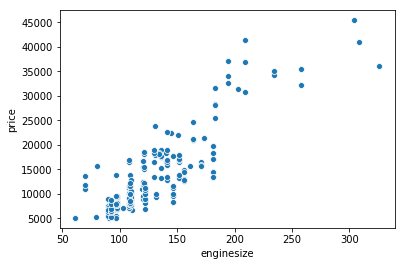

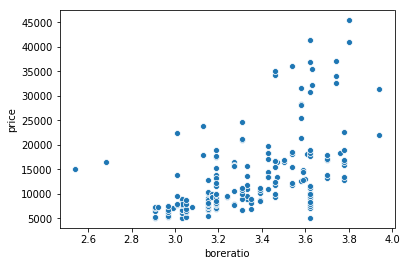

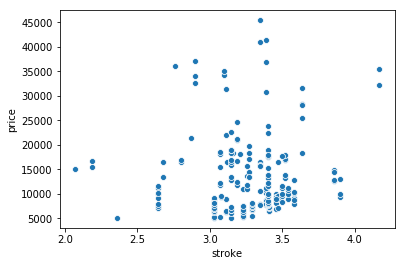

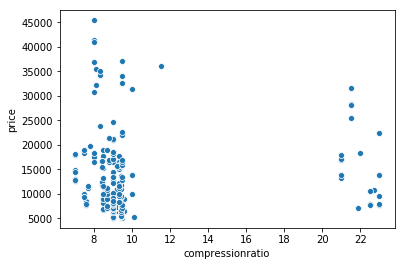

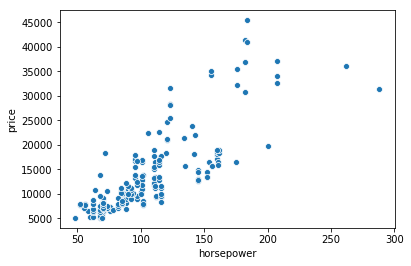

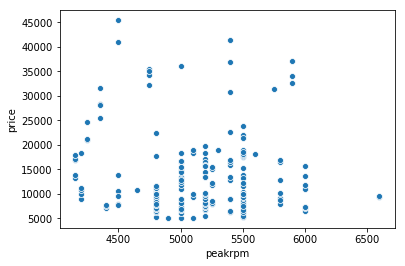

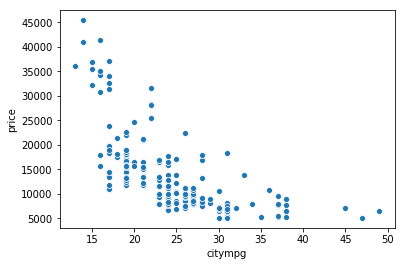

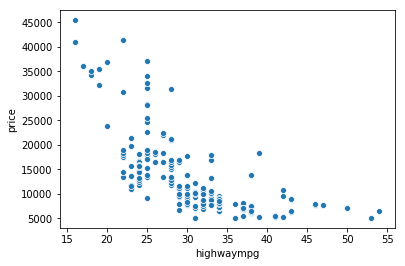

In [21]:
for i in data.select_dtypes(exclude='object').columns[:-1]:
    sns.scatterplot(data[i], data['price'])
    plt.show()

It can be observed that there are some variables that share some sort of positive linear relationship with the variable `price` namely `wheelbase`, `carlength`, `carwidth`, `curbweight`, `enginesize`, and `horsepower`.

There are some variables that share negative relationship as well namely `citympg` and `highwaympg`.

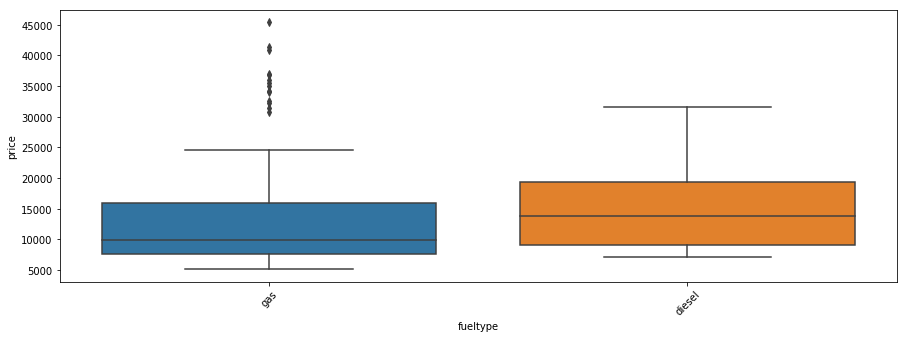

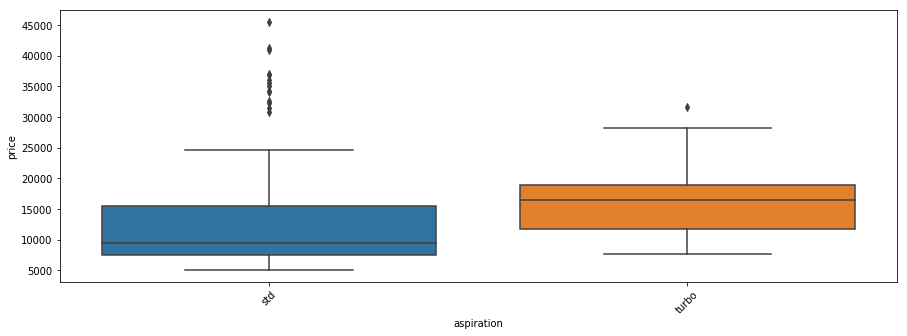

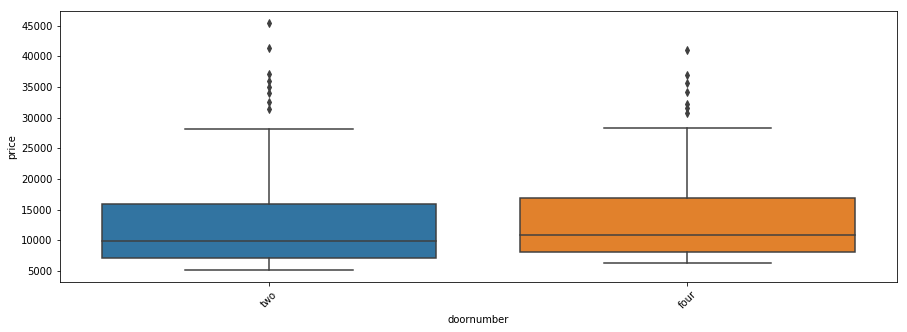

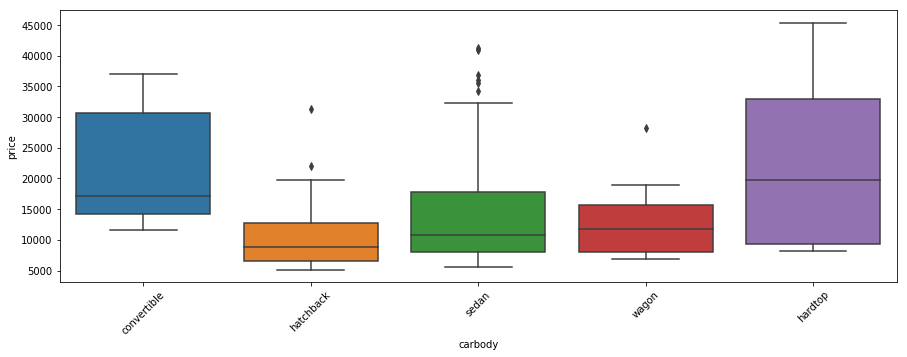

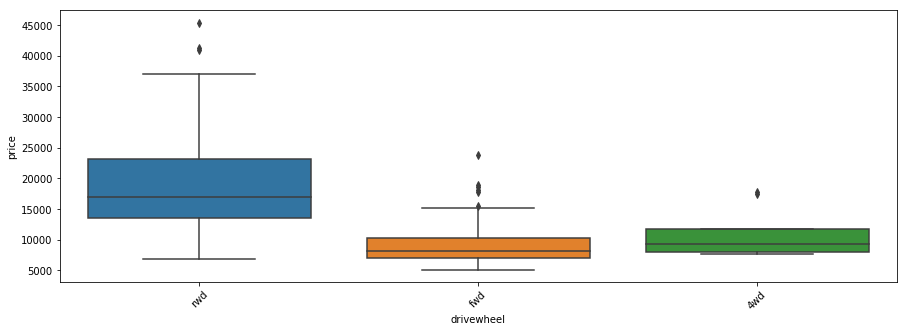

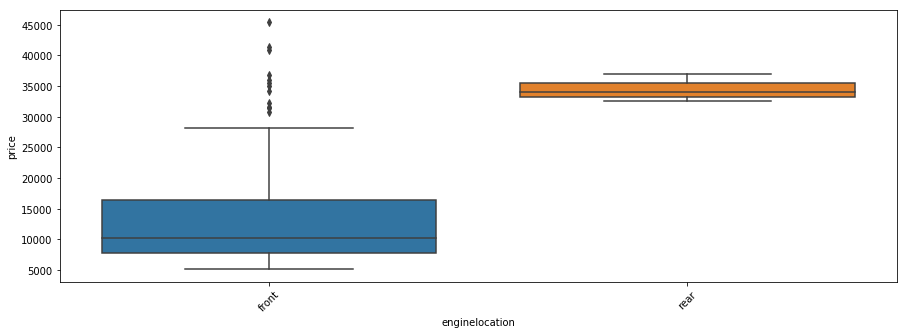

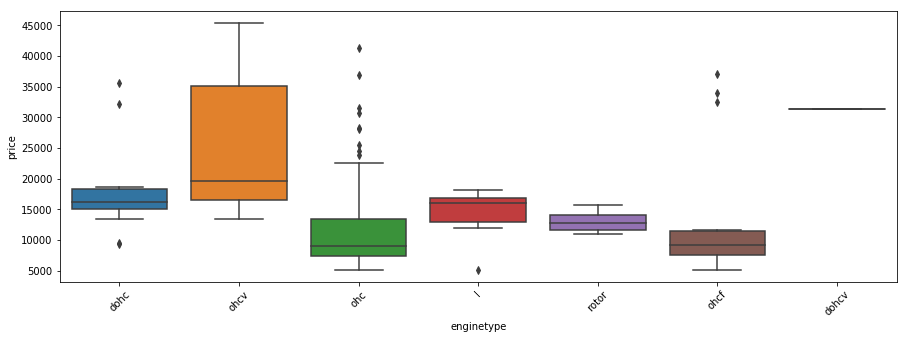

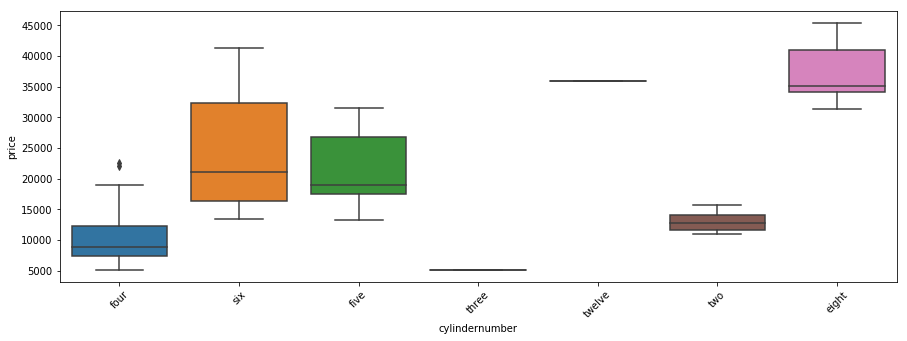

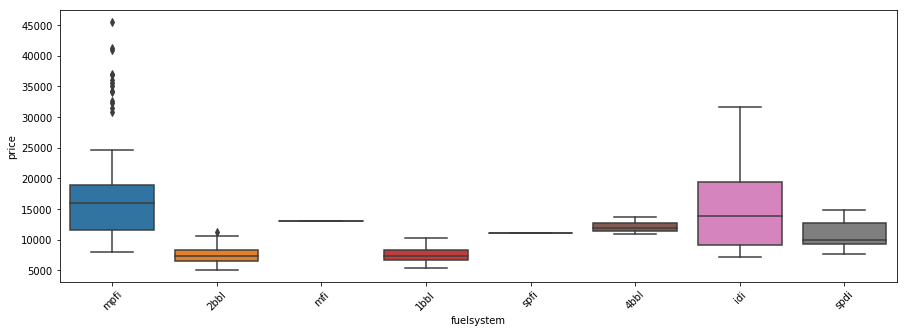

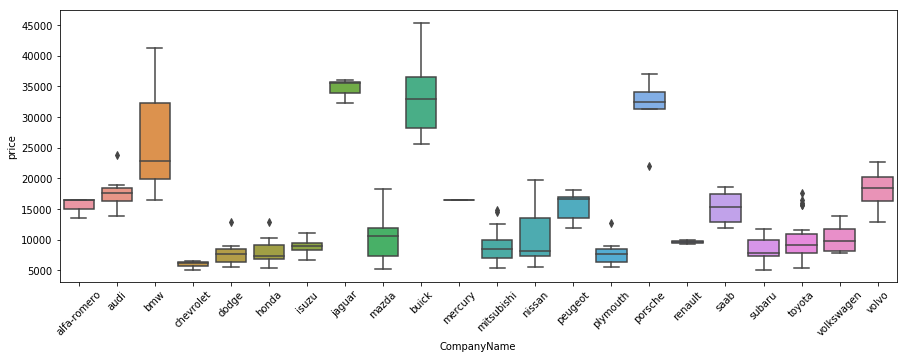

In [22]:
for i in data.select_dtypes(include='object').columns:
    plt.figure(figsize=(15,5))
    sns.boxplot(x=data[i], y=data['price'])
    plt.xticks(rotation=45)
    plt.show()

**Some Observations**
- Cars with `diesel` as their fueltype tend to be a little more expensive as compared to `gas`.
- Cars with `turbo` as their aspiration tend to me more expensive as compared to `std` although in the case of `std` some outliers can be observed.
- Cars with `four` door numbers are a little more expensive as compared to `two`. Outliers can be observed in both the cases.
- Cars with carbody as `hatchback` are the most affordable follwed closely by `sedan` and `wagon` with some variation on the range of prices. `hardtop` has the widest range starting from one of the most affordable cars to the most expensive. `convertible` too has a good range of prices.
- Cars with drivewheel as `rwd` are more expensive as compared to `fwd` and `4wd`. It also has a more flexible range of pricing.
- Cars with `rear` engine location are much more expensive as compared to cars with `front` engine location even though some outliers do exist in this case.
- Some brands of car are quite expensive as compared to the rest namely `bmw`, `jaguar`, `buick`, and `porsche`.
- Some brands has a larger flexibity in price for example `bmw` has higher range of prices as compared to `chevrolet` or `jaguar` etc.

Let's now convert the categorical variables into numbers.

In [23]:
data.select_dtypes(include='object').columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName'],
      dtype='object')

In [24]:
data.select_dtypes(include='object').nunique()

fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
CompanyName       22
dtype: int64

Let's adress those variables first that have two unique categories.

In [25]:
np.unique(data['fueltype'])

array(['diesel', 'gas'], dtype=object)

In [26]:
data['fueltype'] = data['fueltype'].apply(lambda x : 1 if x == 'diesel' else 0)

In [27]:
np.unique(data['aspiration'])

array(['std', 'turbo'], dtype=object)

In [28]:
data['aspiration'] = data['aspiration'].apply(lambda x : 1 if x == 'turbo' else 0)

In [29]:
np.unique(data['doornumber'])

array(['four', 'two'], dtype=object)

In [30]:
data['doornumber'] = data['doornumber'].apply(lambda x : 1 if x == 'four' else 0)

In [31]:
np.unique(data['enginelocation'])

array(['front', 'rear'], dtype=object)

In [32]:
data['enginelocation'] = data['enginelocation'].apply(lambda x : 1 if x == 'rear' else 0)

In [33]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Now, let's address the variable `drivewheel`.

In [34]:
np.unique(data['drivewheel'])

array(['4wd', 'fwd', 'rwd'], dtype=object)

In [35]:
dummy_drivewheel = pd.get_dummies(data['drivewheel'], drop_first=True)

In [36]:
data = pd.concat([dummy_drivewheel, data], axis=1)
data.head()

,fwd,rwd,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,0,1,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,0,1,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,0,1,1,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,1,0,2,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,0,0,2,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [37]:
data.drop('drivewheel', axis=1, inplace=True)
data.head()

,fwd,rwd,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,0,1,3,0,0,0,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,0,1,3,0,0,0,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,0,1,1,0,0,0,hatchback,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,1,0,2,0,0,1,sedan,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,0,0,2,0,0,1,sedan,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Now, `carbody`

In [38]:
dummy_carbody = pd.get_dummies(data['carbody'], drop_first=True)
dummy_carbody.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [39]:
data = pd.concat([dummy_carbody, data], axis=1)
data.head()

,hardtop,hatchback,sedan,wagon,fwd,rwd,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,0,0,0,0,0,1,3,0,0,0,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,0,0,0,0,0,1,3,0,0,0,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,0,1,0,0,0,1,1,0,0,0,hatchback,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,0,0,1,0,1,0,2,0,0,1,sedan,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,0,0,1,0,0,0,2,0,0,1,sedan,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [40]:
data.drop('carbody', axis=1, inplace=True)
data.head()

,hardtop,hatchback,sedan,wagon,fwd,rwd,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,0,1,0,0,0,1,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,0,0,1,0,1,0,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,0,0,1,0,0,0,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Now, `enginetype`, `cylindernumber`

In [41]:
dummy_enginetype = pd.get_dummies(data['enginetype'], drop_first=True)

In [42]:
dummy_cylindernumber = pd.get_dummies(data['cylindernumber'], drop_first=True)

In [43]:
data = pd.concat([dummy_enginetype, dummy_cylindernumber, data], axis=1)
data.head()

,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [44]:
data.drop(['enginetype', 'cylindernumber'], axis=1, inplace=True)
data.head()

,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Now, `fuelsystem`

In [45]:
dummy_fuelsystem = pd.get_dummies(data['fuelsystem'], drop_first=True)
dummy_fuelsystem.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [46]:
data = pd.concat([dummy_fuelsystem, data], axis=1)
data.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [47]:
data.drop('fuelsystem', axis=1, inplace=True)
data.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Now `CompanyName`

In [48]:
dummy_companyname = pd.get_dummies(data['CompanyName'], drop_first=True)
dummy_companyname.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
data = pd.concat([dummy_companyname, data], axis=1)
data.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [50]:
data.drop('CompanyName', axis=1, inplace=True)

In [51]:
data.shape

(205, 65)

In [52]:
data.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Let's now divide our data into train set and test set and also carry out scaling using `MinMaxScaler` as the columns are on different scales.

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
for_scaling = pd.DataFrame(data.select_dtypes(exclude='object').nunique()>2)
vars_for_scaling = for_scaling[for_scaling[0]==True].index
vars_for_scaling = list(vars_for_scaling)
vars_for_scaling

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

These are the columns that we have to scale using MinMaxScaler.

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size=0.8, random_state=100)

In [58]:
df_train[vars_for_scaling] = scaler.fit_transform(df_train[vars_for_scaling])

In [59]:
df_train.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.8,0,0,1,0,0.455172,0.577236,0.491667,0.541667,0.329325,0.181132,0.404762,0.611111,0.18750,0.225000,0.551020,0.305556,0.351351,0.243998
157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.4,0,0,1,0,0.313793,0.409756,0.341667,0.416667,0.240884,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.472222,0.540541,0.057463
81,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1.0,0,0,0,0,0.334483,0.518699,0.425000,0.133333,0.325834,0.230189,0.531746,0.641414,0.09375,0.166667,0.346939,0.333333,0.405405,0.093406
32,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.6,0,0,0,0,0.244828,0.144715,0.308333,0.400000,0.135376,0.067925,0.182540,0.444444,0.19375,0.050000,0.551020,0.694444,0.675676,0.007763
99,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.4,0,0,1,0,0.365517,0.525203,0.408333,0.575000,0.324282,0.222642,0.515873,0.646465,0.09375,0.204167,0.428571,0.388889,0.459459,0.105838


In [60]:
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

Let's now use RFE as the number of columns are quite high.

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)       # Selecting 10 columns
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('audi', False, 11),
 ('bmw', True, 1),
 ('buick', False, 10),
 ('chevrolet', False, 33),
 ('dodge', False, 24),
 ('honda', False, 32),
 ('isuzu', False, 40),
 ('jaguar', False, 35),
 ('mazda', False, 49),
 ('mercury', False, 54),
 ('mitsubishi', False, 20),
 ('nissan', False, 48),
 ('peugeot', False, 6),
 ('plymouth', False, 23),
 ('porsche', True, 1),
 ('renault', False, 45),
 ('saab', False, 15),
 ('subaru', False, 19),
 ('toyota', False, 46),
 ('volkswagen', False, 50),
 ('volvo', False, 14),
 ('2bbl', False, 53),
 ('4bbl', False, 37),
 ('idi', False, 16),
 ('mfi', False, 34),
 ('mpfi', False, 38),
 ('spdi', False, 36),
 ('spfi', False, 55),
 ('dohcv', False, 8),
 ('l', False, 7),
 ('ohc', False, 39),
 ('ohcf', False, 18),
 ('ohcv', False, 43),
 ('rotor', False, 3),
 ('five', False, 5),
 ('four', False, 4),
 ('six', False, 9),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('hardtop', False, 26),
 ('hatchback', False, 27),
 ('sedan', False, 28),
 ('wagon', False, 2

In [64]:
cols=[]
for i in list(zip(X_train.columns,rfe.support_,rfe.ranking_)):
    if i[1] == True:
        cols.append(i[0])

In [65]:
cols

['bmw',
 'porsche',
 'three',
 'twelve',
 'two',
 'enginelocation',
 'carwidth',
 'curbweight',
 'enginesize',
 'boreratio']

In [66]:
X_train = X_train[cols]
X_train.head()

,bmw,porsche,three,twelve,two,enginelocation,carwidth,curbweight,enginesize,boreratio
3,0,0,0,0,0,0,0.491667,0.329325,0.181132,0.404762
157,0,0,0,0,0,0,0.341667,0.240884,0.139623,0.404762
81,0,0,0,0,0,0,0.425000,0.325834,0.230189,0.531746
32,0,0,0,0,0,0,0.308333,0.135376,0.067925,0.182540
99,0,0,0,0,0,0,0.408333,0.324282,0.222642,0.515873


Let's use `statsmodels` for building the Linear Regression model.

In [67]:
import statsmodels.api as sm

In [68]:
X_train_sm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_sm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.56e-76
Time:                        09:32:36   Log-Likelihood:                 223.86
No. Observations:                 164   AIC:                            -425.7
Df Residuals:                     153   BIC:                            -391.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1549      0.017     -9.

This model has achieved an `R-squared` value of 0.915 and `Adj. R-squared` value of 0.909. From the p-value, it can be observed that the column `twelve` is insignificant. But let's also calculate the VIF values.

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending =  False)
vif

,Feature,VIF
7,curbweight,42.074308
8,enginesize,25.888769
6,carwidth,22.709464
9,boreratio,9.784267
1,porsche,2.206690
5,enginelocation,2.188027
3,twelve,1.481440
4,two,1.257853
0,bmw,1.169605
2,three,1.007064


Let's first drop the variables based on their p-value and after that is completed, dropping will take place according to VIF values, if any.

In [71]:
X_train.drop('twelve', axis=1, inplace=True)

In [72]:
X_train_sm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_sm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     183.6
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.29e-77
Time:                        09:32:56   Log-Likelihood:                 223.70
No. Observations:                 164   AIC:                            -427.4
Df Residuals:                     154   BIC:                            -396.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1545      0.017     -9.

All the variables are under permissible limits as far as p-value is concerned. Let's now remove variables based on their VIF values.

In [73]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending =  False)
vif

,Feature,VIF
6,curbweight,39.346932
5,carwidth,22.595700
7,enginesize,18.559723
8,boreratio,9.629346
1,porsche,2.196218
4,enginelocation,2.161816
3,two,1.195686
0,bmw,1.130407
2,three,1.006952


Dropping `curbweight`

In [74]:
X_train.drop('curbweight', axis=1, inplace=True)

In [75]:
X_train_sm = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_sm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     180.0
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.16e-74
Time:                        09:33:10   Log-Likelihood:                 212.95
No. Observations:                 164   AIC:                            -407.9
Df Residuals:                     155   BIC:                            -380.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1723      0.017     -9.

It can be observed that the p-values for the variables `porsche` and `boreratio` has increased but still under tolerable limits.

In [76]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending =  False)
vif

,Feature,VIF
5,carwidth,14.692161
6,enginesize,10.115471
7,boreratio,9.205405
4,enginelocation,2.159169
1,porsche,2.103735
3,two,1.150833
0,bmw,1.130405
2,three,1.006646


Dropping `carwidth`

In [77]:
X_train.drop('carwidth', axis=1, inplace=True)

In [78]:
X_train_sm = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train, X_train_sm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.45e-59
Time:                        09:33:20   Log-Likelihood:                 174.04
No. Observations:                 164   AIC:                            -332.1
Df Residuals:                     156   BIC:                            -307.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0826      0.019     -4.

It can be observed that the p-value of the variable `boreratio` has just shot up tp 0.914. Therefore, dropping this variable.

In [79]:
X_train.drop('boreratio', axis=1, inplace=True)

In [80]:
X_train_sm = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train, X_train_sm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     141.3
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.17e-60
Time:                        09:33:30   Log-Likelihood:                 174.04
No. Observations:                 164   AIC:                            -334.1
Df Residuals:                     157   BIC:                            -312.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0840      0.013     -6.

Dropping `three` 

In [81]:
X_train.drop('three', axis=1, inplace=True)

In [82]:
X_train_sm = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train, X_train_sm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     169.4
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.38e-61
Time:                        09:33:36   Log-Likelihood:                 173.54
No. Observations:                 164   AIC:                            -335.1
Df Residuals:                     158   BIC:                            -316.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0820      0.013     -6.

p-values for variables are under tolerable limits for now.

In [83]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending =  False)
vif

,Feature,VIF
1,porsche,2.070413
3,enginelocation,2.000756
4,enginesize,1.174869
0,bmw,1.092688
2,two,1.000692


It can also be observed that the VIF values of these variables are also under tolerable limits.

Now, let's make predictions on our training set.

In [84]:
y_train_pred = lr_6.predict(X_train_sm)

Let's carry out `Residual Analysis`

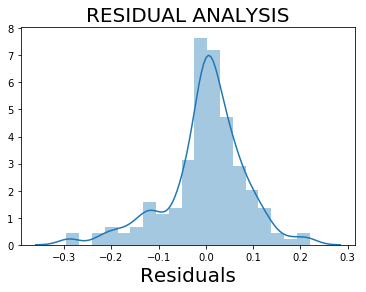

In [85]:
residual = y_train_pred - y_train
sns.distplot(residual)
plt.title('RESIDUAL ANALYSIS', fontsize=20)
plt.xlabel('Residuals', fontsize=20)
plt.show()

It can be observed that the residuals follow Normal Distribution.

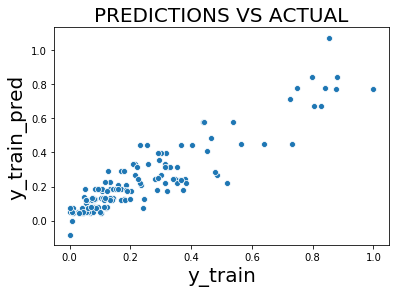

In [86]:
sns.scatterplot(y_train, y_train_pred)
plt.xlabel('y_train', fontsize=20)
plt.ylabel('y_train_pred', fontsize=20)
plt.title('PREDICTIONS VS ACTUAL', fontsize=20)
plt.show()

Predictions and the Actual data are quite closely related.

Now, let's make predictions on test data.

In [87]:
df_test.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,70,4800,38,47,7738.0
186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,0,0,1,0,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,85,5250,27,34,8495.0
59,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,4800,26,32,8845.0
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112,6600,26,29,9298.0
140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,4400,26,31,7603.0


In [88]:
df_test[vars_for_scaling] = scaler.transform(df_test[vars_for_scaling])

In [89]:
df_test.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.4,0,0,1,0,0.313793,0.409756,0.341667,0.433333,0.235066,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382
186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.8,0,0,1,0,0.368966,0.497561,0.433333,0.658333,0.305275,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295
59,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.6,0,0,0,0,0.420690,0.596748,0.516667,0.491667,0.347944,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0.6,0,0,0,0,0.272414,0.448780,0.308333,0.400000,0.301396,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479
140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.8,0,0,0,0,0.231034,0.263415,0.291667,0.658333,0.291699,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652


In [90]:
X_test = df_test[['bmw', 'porsche', 'two', 'enginelocation', 'enginesize']]
y_test = df_test['price']

In [91]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_6.predict(X_test_sm)

In [92]:
y_test_pred.head()

160    0.079234
186    0.127166
59     0.183814
165    0.079234
140    0.122809
dtype: float64

Let's calculate `R-squared` value on our test set.

In [93]:
from sklearn.metrics import r2_score, mean_squared_error

In [94]:
round(r2_score(y_test, y_test_pred), 3)

0.847

`R-squared` of 84.7% has been obtained on the test data which is a good value to achieve.

Let's also calculate the `Mean Squared Error`.

In [95]:
mean_squared_error(y_test, y_test_pred)

0.009022726414334884

`Mean Squared Error` is also quite low, almost negligible.

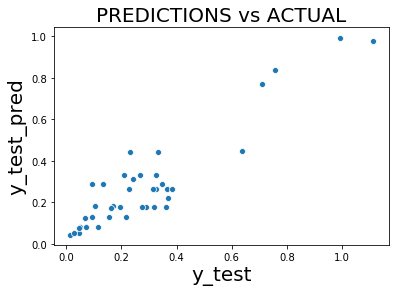

In [96]:
sns.scatterplot(y_test, y_test_pred)
plt.title('PREDICTIONS vs ACTUAL', fontsize=20)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_test_pred', fontsize=20)
plt.show()

In [97]:
round(pd.concat([y_test, y_test_pred], axis=1).corr().iloc[1,0], 3)

0.92

It can be observed that even on the test data, the Preidctions and the Actual data are quite closely related and the correlation between then is 0.92, thereby suggesting that the model is generalizing with a good degree of accuracy.

# Conclusion
 *The model that we have finally chosen is the* `lr_16` *which provided us with an `R-squared` value of 0.847 on the test data which means that 84.7% of variance can be explained by this model.*
 

- The Linear Regression model can be represented by the following equation:
    $ predictions = -0.0820 + 0.2096 \times bmw + 0.1730 \times porsche + 0.2502 \times two + 0.1696 \times enginelocation + 1.1547 \times enginesize $ <br>
    
    *NOTE:* `bmw` and `porsche` are the names of the car company and `two` represents the number of cylinders.<br>
<br>

- `bmw` and `porsche` are not actionable features, as the client company can't "increase" its *bmw* or *porsche* factor as they are other Brand names. Brands represent overall quality, design, range of prices, marketing strategies etc. of the given product. It could mean that the client company can learn and adapt from them about all these specifics.<br>


- `two` represents cylinder number in a car. It means the number of cylinders other than two doesn't matter much as the people generally purchase two cylinder cars. Therefore, its better for the client company to have cars mostly with two cylinders . <br>


- `enginelocation` and `enginesize` are actionable for the client company. Therefore, depending upon the price they want to sell for, they can decide upon the size and location of the engine as they are significant in determining the prices.